# Logistic Regression

逻辑回归训练集准确率：0.850
逻辑回归测试集准确率：0.733
逻辑回归模型准确率：0.733


<ipython-input-28-36c8a460b739>:44: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_pred, cmap=cm_light)


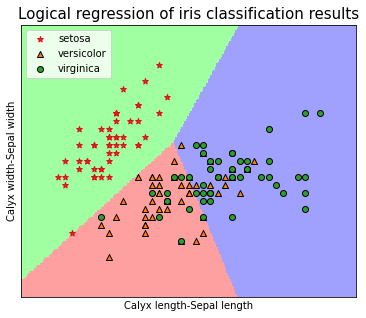

In [28]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
Y = iris.target
# 将数据划分为训练集和测试集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)
# 导入模型，调用逻辑回归 LogisticRegression()函数
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',
                        solver='newton-cg',
                        multi_class='multinomial')
lr.fit(x_train, y_train)

# 对模型进行评估
print('逻辑回归训练集准确率：%.3f' % lr.score(x_train, y_train))
print('逻辑回归测试集准确率：%.3f' % lr.score(x_test, y_test))
from sklearn import metrics

pred = lr.predict(x_test)
accuracy = metrics.accuracy_score(y_test, pred)
print('逻辑回归模型准确率：%.3f' % accuracy)

import numpy as np

lx1, rx1 = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
lx2, rx2 = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
h = 0.02
x1, x2 = np.meshgrid(np.arange(lx1, rx1, h), np.arange(lx2, rx2, h))
grid_test = np.stack((x1.flat, x2.flat), axis=1)
grid_pred = lr.predict(grid_test)
grid_pred = grid_pred.reshape(x1.shape)
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.figure(1, figsize=(6, 5))
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
plt.pcolormesh(x1, x2, grid_pred, cmap=cm_light)
plt.scatter(X[:50, 0], X[:50, 1], marker='*', edgecolors='red', label='setosa')
plt.scatter(X[50:100, 0],
            X[50:100, 1],
            marker='^',
            edgecolors='k',
            label='versicolor')
plt.scatter(X[100:150, 0],
            X[100:150, 1],
            marker='o',
            edgecolors='k',
            label='virginica')
plt.xlabel('Calyx length-Sepal length')
plt.ylabel('Calyx width-Sepal width')
plt.legend(loc=2)
plt.xlim(lx1.min(), rx1.max())
plt.ylim(lx2.min(), rx2.max())
plt.title("Logical regression of iris classification results", fontsize=15)
plt.xticks(())
plt.yticks(())
plt.grid()
plt.show()

# KNN


手写数据集

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

datasets = load_digits()
X_train, X_test, y_train, y_test = train_test_split(datasets['data'], datasets['target'], test_size=0.3, random_state = 0)

KNN = KNeighborsClassifier(n_neighbors = 7)

KNN.fit(X_train, y_train)

print("score:{:,2f}", format(KNN.score(X_test, y_test)))

X_try = np.random.uniform(low=1.0, high=10.0, size=64)

X_try = np.array([X_try])

prediction = KNN.predict(X_try)

print("score:{:,2f}", format(prediction))

score:{:,2f} 0.9796296296296296
score:{:,2f} [0]


波士顿房价

(152,)


Text(0.5, 1.0, 'r2=0.341013491585449')

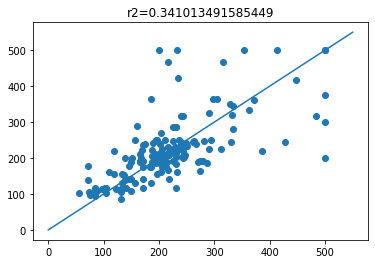

In [ ]:
from sklearn.datasets import load_boston
import numpy as np

Data = load_boston()
x = Data.data
y = Data.target*10
y.shape

In [ ]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=1)

KNN.fit(x_train, y_train)

pred = KNN.predict(x_test)
print(pred.shape)

import matplotlib.pyplot as plt

plt.scatter(y_test, pred)
plt.plot([0, max([y_test.max(), pred.max()]) * 1.1], [0, max([y_test.max(), pred.max()]) * 1.1])

from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(pred,y_test)}')


# Naive Bayes


手写数据集

In [9]:
# 导入数据
from sklearn.datasets import load_digits
import numpy as np

Data = load_digits()
x = Data.data
y = Data.target

y


array([0, 1, 2, ..., 8, 9, 8])

0.9222222222222223


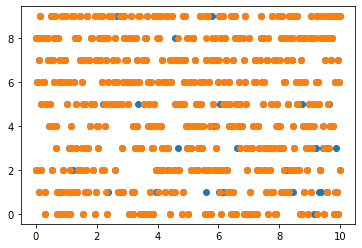

In [10]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

from sklearn.naive_bayes import GaussianNB

Bys = GaussianNB(var_smoothing = 2e-2)

Bys.fit(X_train, y_train)

from sklearn import metrics

pred = Bys.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)

print(accuracy)

import matplotlib.pyplot as plt
x=np.linspace(0,10,len(y_test))
plt.scatter(x,y_test)
plt.scatter(x,pred)
plt.show()



波士顿房价

D:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'r2=0.09838124937135428')

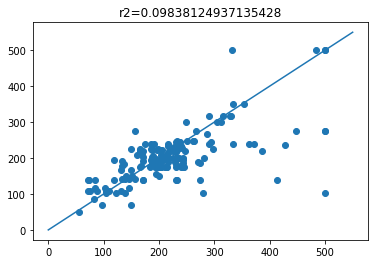

In [28]:
from sklearn.datasets import load_boston
import numpy as np

X = load_boston().data
Y = load_boston().target
X = X.reshape(-1, 13)
Y = (Y*10).reshape(-1, 1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing=1e-10)
NB.fit(x_train, y_train)

pred = NB.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, pred)
plt.plot([0, max([y_test.max(), pred.max()]) * 1.1],
         [0, max([y_test.max(), pred.max()]) * 1.1])

from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(pred,y_test)}')


# Decision Tree

0.8555555555555555


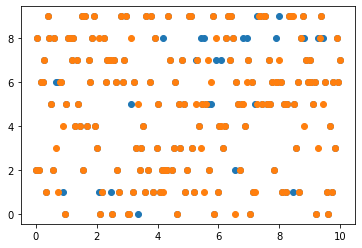

x: 180
y: 1797
x_train: 120
y_train: 1617
X_test: 180
y_test: 180
pred: 180


In [31]:
from sklearn.datasets import load_digits
import numpy as np

Data = load_digits()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Data['data'], Data['target'], test_size=0.1, random_state= 0)

from sklearn.tree import DecisionTreeClassifier

DST = DecisionTreeClassifier(criterion='entropy', max_depth=70, splitter= 'best')
DST.fit(X_train, y_train)

from sklearn import metrics
pred = DST.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)
print(accuracy)

import matplotlib.pyplot as plt

x = np.linspace(0, 10, len(y_test))
plt.scatter(x, y_test)
plt.scatter(x, pred)
plt.show()

print('x:', len(x))
print('y:', len(y))
print('x_train:', len(x_train))
print('y_train:', len(y_train))
print('X_test:', len(X_test))
print('y_test:', len(y_test))
print('pred:', len(pred))

# Random Forest

RFC_accuracy 模型综合评估矩阵如下：0.978


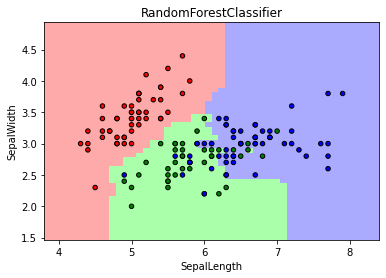

In [32]:
# 导入数据并划分
from sklearn import datasets
from sklearn.model_selection import train_test_split
iris = datasets.load_iris()
X = iris.data
Y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
from sklearn.ensemble import RandomForestClassifier
# 训练随机森林模型
RFC = RandomForestClassifier(n_estimators=100,bootstrap='true',random_state=0,max_depth=4)
RFC.fit(x_train,y_train)
# 预测
RFC_pred = RFC.predict(x_test)
#对模型进行评估
from sklearn import metrics
RFC_accuracy = metrics.accuracy_score(y_test,RFC_pred)
print('RFC_accuracy 模型综合评估矩阵如下：%.3f'% RFC_accuracy)

"""
参数详解
n_estimators: 代表在预测之前，你想要建立的子树数量。n_estimators过小容易欠拟合，而过大不能显著地提升模型。一般对随机森林的参数调整也都集中在n_estimators上。
bootstrap: 代表是否对样本集进行有放回抽样来构建
random_state：代表随机种子
max_depth：决策树参数，代表决策树的最大深度。如果模型的样本总量多，特征也多，可以限制最大深度；若样本量少或者特征少，则不限制最大深度。
可视化：
这里我们选择花萼长度和花萼宽度作为特征。
"""
x = iris.data[:,:2]
pred = RFC.fit(x,Y)
cmap_light = mpl.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_dark = mpl.colors.ListedColormap(['r','g','b'])
h = 50
lx1,rx1 = x[:,0].min()-0.5, x[:,0].max()+0.5
lx2,rx2 = x[:,1].min()-0.5, x[:,1].max()+0.5
x1,y1 = np.meshgrid(np.linspace(lx1,rx1,h),np.linspace(lx2,rx2,h))
RFC_test = np.stack((x1.flat,y1.flat),axis = 1)
test_pred = RFC.predict(RFC_test)
plt.figure()
plt.pcolormesh(x1,y1,test_pred.reshape(x1.shape),shading='auto',cmap=cmap_light)
plt.scatter(x[:,0],x[:,1],c=Y,cmap = cmap_dark,edgecolors='k',s=20)
plt.xlim(x1.min(),x1.max())
plt.title('RandomForestClassifier')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

# SVM

手写数据集


训练：1.000
测试：0.980
x: 150
y: 1797
x_train: 1257
y_train: 1257
x_test: 540
y_test: 540
pred: 540


<function matplotlib.pyplot.show(close=None, block=None)>

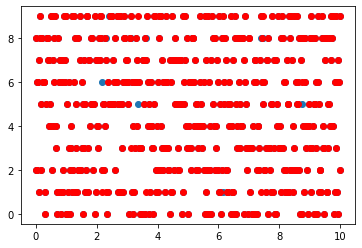

In [33]:
# 导入数据集
from sklearn import datasets

iris = datasets.load_digits()
# 数据集划分
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)
# 训练SVM分类器
from sklearn import svm

S = svm.SVC(C=1.0, kernel='poly', decision_function_shape='ovr', gamma=0.01)
S.fit(x_train, y_train)
#print(x)

"""参数详解
    对于svm的SVC参数，我们主要关注以下几个部分

    C：惩罚参数，默认值为1。C越大，对误分类的惩罚增大，趋向于全部分对的状况，这样对
       训练集的测试率很高，但泛化能力较弱。C越小，对误分类的惩罚减小，允许容错，泛化能力较强。
    kernel：核函数，默认值是rbf，也可以是'linear','poly','sigmid','precomputed'，不同的核函数对应有不同的参数，比如对于rbf，gamma就是他的参数，
       一般取1/n。如何选择kernel，则需要具体问题、具体分析。
    
"""
print('训练：%.3f' % S.score(x_train, y_train))
print('测试：%.3f' % S.score(x_test, y_test))

pred = S.predict(x_test)

print('x:', len(x))
print('y:', len(y))
print('x_train:', len(x_train))
print('y_train:', len(y_train))
print('x_test:', len(x_test))
print('y_test:', len(y_test))
print('pred:', len(pred))


import matplotlib.pyplot as plt

x = np.linspace(0, 10, len(y_test))
x_pred = np.linspace(0, 10, len(pred))
plt.scatter(x, y_test)
plt.scatter(x_pred, pred, color='red')
plt.show


波士顿房价

(506, 13)


D:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


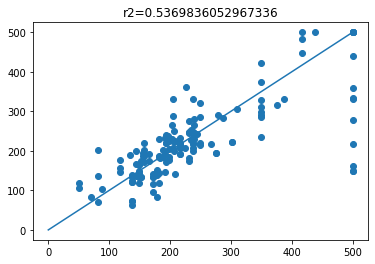

In [93]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from math import log

boston = load_boston()
X = boston.data
Y = boston.target

X = X.reshape(-1, 13)
Y = (Y*10).reshape(-1, 1)

# X = StandardScaler().fit_transform(X)
# Y = StandardScaler().fit_transform(Y)

# X = MinMaxScaler().fit_transform(X)
# Y = MinMaxScaler().fit_transform(Y)

# X = X.reshape(-1, 13)

print(X.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

clf = make_pipeline(MinMaxScaler(), LinearSVC(random_state=0, tol=5e-7))

clf.fit(x_train, y_train)

# print(clf.named_steps['linearsvc'].coef_)

# print(clf.named_steps['linearsvc'].intercept_)

pred = clf.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(pred, y_test)

from sklearn.metrics import r2_score
plt.title(f'r2={r2_score(pred,y_test)}')
plt.plot([0, 500], [0, 500])

# SVR

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
"""X = np.linspace(1,10,10)
Y = np.array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000])"""
boston = load_boston()
X = boston.data
Y = boston.target

X = X.reshape(-1, 13)
Y = Y.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# X = StandardScaler().fit_transform(X)
# Y = StandardScaler().fit_transform(Y)

X = MinMaxScaler().fit_transform(X)
Y = MinMaxScaler().fit_transform(Y)

X = X.reshape(-1, 13)
Y = Y.reshape(-1, 1)
print(X.shape)

(506, 13)


X: (506, 13)
Y: (506, 1)
X: (506, 13)
Y: (506, 1)
0.8254677893533995


D:\Python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Text(0.5, 1.0, 'r2=0.7809280110200197')

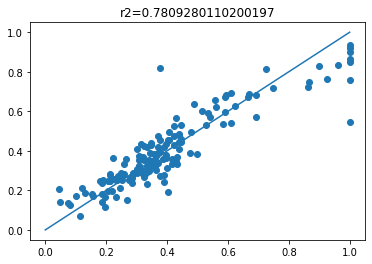

In [99]:
print('X:', X.shape)
print('Y:', Y.shape)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

x_train


from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = MinMaxScaler().fit_transform(X)
Y = MinMaxScaler().fit_transform(Y)

print('X:', X.shape)
print('Y:', Y.shape)


plt.scatter
from sklearn.svm import SVR

regression = SVR(kernel='rbf')

regression.fit(x_train, y_train)

pred = regression.predict(x_test)

from sklearn import metrics
from sklearn.metrics import explained_variance_score
score = explained_variance_score(y_test,pred)

print(score)
plt.scatter(y_test, pred)
plt.plot([0, max([pred.max(), y_test.max()])],
         [0, max([pred.max(), y_test.max()])])

from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(pred,y_test)}')


# Convolutional Neural Network

(1797, 1)
(1797, 10)
(1257, 10)
Epoch 1/10
32/32 [==============================] - 2s 24ms/step - loss: 2.2329 - acc: 0.2388 - val_loss: 2.0075 - val_acc: 0.3571
Epoch 2/10
32/32 [==============================] - 0s 12ms/step - loss: 1.4753 - acc: 0.5323 - val_loss: 0.8788 - val_acc: 0.7302
Epoch 3/10
32/32 [==============================] - 0s 12ms/step - loss: 0.7481 - acc: 0.7522 - val_loss: 0.5095 - val_acc: 0.8492
Epoch 4/10
32/32 [==============================] - 0s 12ms/step - loss: 0.4819 - acc: 0.8299 - val_loss: 0.4171 - val_acc: 0.8611
Epoch 5/10
32/32 [==============================] - 0s 13ms/step - loss: 0.3808 - acc: 0.8776 - val_loss: 0.2731 - val_acc: 0.9325
Epoch 6/10
32/32 [==============================] - 0s 13ms/step - loss: 0.2777 - acc: 0.9194 - val_loss: 0.1916 - val_acc: 0.9484
Epoch 7/10
32/32 [==============================] - 0s 14ms/step - loss: 0.1781 - acc: 0.9403 - val_loss: 0.2026 - val_acc: 0.9325
Epoch 8/10
32/32 [==============================] -

<ipython-input-53-a48fef874660>:55: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(history.epoch, history.history.get('loss'), Label='loss')


17/17 [==============================] - 0s 3ms/step - loss: 0.1223 - acc: 0.9630
[0.12234418094158173, 0.9629629850387573]
r2=0.932833400026553


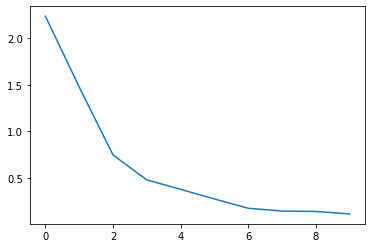

In [53]:
from sklearn.datasets import load_digits
import numpy as np

X = load_digits().data.astype(np.float32)
Y = load_digits().target.astype(np.float32).reshape(-1, 1)
print(Y.shape)

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

from sklearn.preprocessing import OneHotEncoder

Y = OneHotEncoder().fit_transform(Y).todense()
print(Y.shape)

X = X.reshape(-1, 8, 8, 1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=Y)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    epochs=10,
                    verbose=1)
import matplotlib.pyplot as plt
plt.plot(history.epoch, history.history.get('loss'), Label='loss')

pred = model.predict(x_test)
score = model.evaluate(x_test, y_test)
print(score)

print(f'r2={r2_score(y_test,pred)}')

# Deep Neural Network

(506, 1)


<ipython-input-19-a7b0b6c9044a>:61: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(history.epoch, history.history.get('loss'), Label='loss')


5/5 [==============================] - 1s 4ms/step - loss: 0.0083 - mae: 0.0647
[0.008268404752016068, 0.06468242406845093]
r2=-2.764101374219428


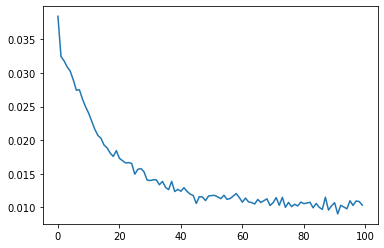

In [19]:
import tensorflow as tf
from sklearn.datasets import load_boston


boston = load_boston()
X = boston.data
Y = boston.target*10
#print(Y)
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# X = StandardScaler().fit_transform(X)
# Y = StandardScaler().fit_transform(Y)

X = MinMaxScaler().fit_transform(X)
Y = MinMaxScaler().fit_transform(Y)

X = X.reshape(-1, 13)
print(Y.shape)


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3)


class haltCallback(tf.keras.callbacks.Callback):
    def one_epoch_end(self, epoch, logs={}):
        if (logs.get('loss')<=5):
            #print('Training is end!')
            self.model.stop_training = True

trainStopCallback = haltCallback()


model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(64, input_shape=(13,),
                              activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        #tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Dense(1)
    ]
)

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(x_train,
                    y_train,
                    validation_split=0,
                    epochs=100,
                    batch_size=1,
                    callbacks=[trainStopCallback],
                    verbose=0)

import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history.get('loss'), Label='loss')

print(model.evaluate(x_test, y_test))

from sklearn.metrics import r2_score

print(f'r2={r2_score(pred,y_test)}')

0.559510804661698


Text(0.5, 1.0, 'r2=0.559510804661698')

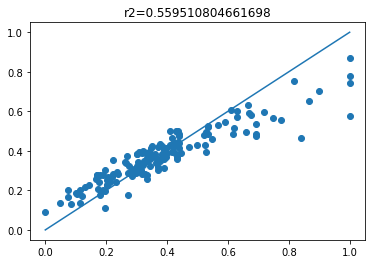

In [20]:
from sklearn.metrics import r2_score

pred = model.predict(x_test)
r2 = r2_score(pred, y_test)

print(r2)

plt.plot([0, 1], [0, 1])
plt.scatter(y_test, pred)
from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(pred,y_test)}')

# Gaussion Regression

调用George库

354
354


Text(0.5, 1.0, 'r2=1.0')

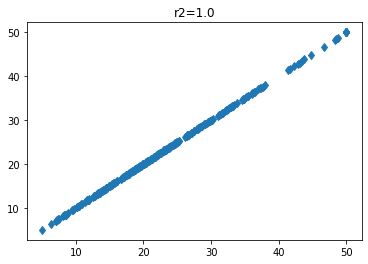

In [56]:
import george
from george import kernels


from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
Y = boston.target


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.3)
#print(y_train)
kernel = 1 * kernels.ExpSquaredKernel(0.5, ndim=13)
gp = george.GP(kernel)
gp.compute(x_train)

pred, pred_var = gp.predict(y_train, x_train, return_var=True)

#pred = gp.predict(x_test)
print(len(pred))
print(len(y_train))


import matplotlib.pyplot as plt

plt.plot(y_train, pred, 'd')

from sklearn.metrics import r2_score

plt.title(f'r2={r2_score(pred,y_train)}')


调用sklearn中的Gaussian方法


In [22]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from math import log

boston = load_boston()
X = boston.data
Y = boston.target

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# X = StandardScaler().fit_transform(X)
# Y = StandardScaler().fit_transform(Y)

X = MinMaxScaler().fit_transform(X)
Y = MinMaxScaler().fit_transform(Y)

X = X.reshape(-1, 13)

print(X.shape)



(506, 13)


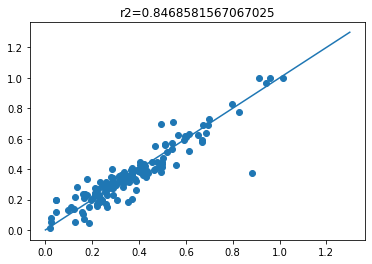

In [53]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

kernel = ConstantKernel(constant_value=2, constant_value_bounds=(1, 1e4)) +  RBF(length_scale=5, length_scale_bounds=(1, 1e4))


#kernel = 2 * ( 20 * RBF() + 20 * WhiteKernel() + 20 * DotProduct() + 20 * ConstantKernel() )


reg = GaussianProcessRegressor(kernel = 2 * kernel ,random_state=0)

reg.fit(x_train, y_train)

pred = reg.predict(x_test)

import matplotlib.pyplot as plt

plt.scatter(pred, y_test)

from sklearn.metrics import r2_score
plt.title(f'r2={r2_score(pred,y_test)}')
plt.plot([0, 1.3], [0, 1.3])
#plt.xlim(xmin=-0.7, xmax=1.5)


# K-means

手写数据集

In [88]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

X = load_digits().data
Y = load_digits().target





X_data = X[:, 0]
print('Y:', Y.shape)
print('X_data:', X_data.shape)
print(Y)

Y: (1797,)
X_data: (1797,)
[0 1 2 ... 8 9 8]


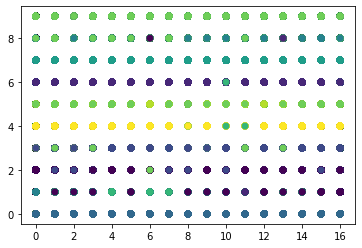

In [96]:



km = KMeans(n_clusters = 10) # 分成10类

km.fit(X)

pred = km.predict(X)

import matplotlib.pyplot as plt
for i in range(0,64):
    plt.scatter(X[:,i], Y, c=pred)


(150,)
(150,)


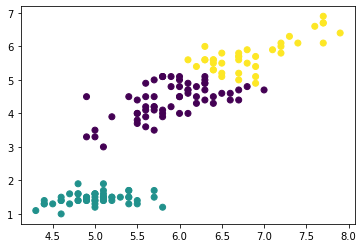

In [90]:
# 导入相关模块
from sklearn.cluster import KMeans
# 导入数据集
from sklearn.datasets import load_iris
# 读入数据
iris = load_iris()
x = iris.data[:,0]
y = iris.data[:,2]
print(x.shape)
print(y.shape)
#训练模型
km = KMeans(n_clusters = 3)
km.fit(iris.data)
# 对数据进行预测
y_predicted = km.predict(iris.data)
#对预测的数据绘制散点图
import matplotlib.pyplot as plt
plt.scatter(x,y,c=y_predicted)
plt.show()